# Used car selling price prediction using machine learning

### importing packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Exploring the dataset

In [101]:
train_df = pd.read_csv('train-data.csv')
test_df = pd.read_csv('test-data.csv')

In [102]:
print(f"shape of training data  {train_df.shape} and testing data is {test_df.shape}" )

shape of training data  (6019, 14) and testing data is (1234, 13)


In [103]:
train_df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [104]:
test_df['Price'] = np.nan
test_df = test_df[train_df.columns]

In [105]:
test_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,NaN
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,NaN


In [106]:
df = pd.concat([train_df, test_df], axis=0)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [107]:
df[df.Price.isnull()].shape

(1234, 14)

### Data cleaning (filling null values,filtering features,handeling missing values, encoding  etc.)

In [108]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [109]:
##here I am adding new feature Age_of_car according to current year in the palce of year
current_year = 2021
df['Age_of_car'] = current_year-df.Year
df.drop('Year', axis=1, inplace=True)
df['Age_of_car'].head()

0    11
1     6
2    10
3     9
4     8
Name: Age_of_car, dtype: int64

In [110]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age_of_car
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,10
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,8


In [111]:
df.Mileage = df.Mileage.str.split(expand=True)[0]
df.Engine = df.Engine.str.split(expand=True)[0]
df.Power = df.Power.str.split(expand=True)[0]

In [112]:
df.Mileage.dtype

dtype('O')

In [113]:
##changing datatype 
df.Power = pd.to_numeric(df.Power, errors='coerce')
df.Mileage = pd.to_numeric(df.Mileage, errors='coerce')
df.Engine = pd.to_numeric(df.Engine, errors='coerce')

In [114]:
df.Mileage.dtype

dtype('float64')

In [115]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age_of_car
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,10
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,8


In [116]:
df.isnull().sum()

Name                    0
Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Age_of_car              0
dtype: int64

In [117]:
##this column contains maximum number of null values and filling more than 75% of a column is not an appropiate approach
df.drop('New_Price', axis=1, inplace=True)

In [118]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [119]:
for col in ['Mileage','Engine','Power']: 
    df[col] = df[col].fillna(df[col].mean(), axis=0)

In [120]:
df.Seats.value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [121]:
##most of the cars have 5 sits in the dataset 
df['Seats'].fillna(value=5.0, inplace=True)

### Encoding

In [122]:
a = dict()
b = .001
for k in df['Fuel_Type'].unique():
    a[k]=b
    b = b+.0001
print(a)

{'CNG': 0.001, 'Diesel': 0.0011, 'Petrol': 0.0012000000000000001, 'LPG': 0.0013000000000000002, 'Electric': 0.0014000000000000002}


In [123]:
e=dict()
f = 0.001
for j in df['Location'].unique():
    e[j]=f
    f=f+0.001
print(e)

{'Mumbai': 0.001, 'Pune': 0.002, 'Chennai': 0.003, 'Coimbatore': 0.004, 'Hyderabad': 0.005, 'Jaipur': 0.006, 'Kochi': 0.007, 'Kolkata': 0.008, 'Delhi': 0.009000000000000001, 'Bangalore': 0.010000000000000002, 'Ahmedabad': 0.011000000000000003}


In [124]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [125]:
col = {"Manual" :1,"Automatic" :2}

In [126]:
d = {'First': 4, 'Second': 3, 'Fourth & Above': 1, 'Third': 2}

In [127]:
Brand_name = list()
for i in df['Name'].values:
    Brand_name.append(i.split()[0])

In [128]:
df['Brand_name'] = Brand_name

In [129]:
## giving importants to brand value
list1= ['Maruti','Hyundai','Honda','Tata','Mahindra','Ford','Datsun','Toyota','Chevrolet'
        ,'Skoda','Jeep','Smart','Isuzu','ISUZU','Force','Volkswagen','Renault','Mitsubishi']
list2 = ['Audi','Nissan','Mercedes-Benz','BMW','Porsche','Jaguar','Volvo','Mini','Bentley','Lamborghini','Land']
list3 = ['Ambassador','OpelCorsa','Fiat','Hindustan']

In [130]:
p = dict()
for i in df['Brand_name'].unique():
    if i in list1:
        p[i]= 1
    if i in list2:
        p[i]= 2
    if i in list3:
        p[i]= 0
print(p)

{'Maruti': 1, 'Hyundai': 1, 'Honda': 1, 'Audi': 2, 'Nissan': 2, 'Toyota': 1, 'Volkswagen': 1, 'Tata': 1, 'Land': 2, 'Mitsubishi': 1, 'Renault': 1, 'Mercedes-Benz': 2, 'BMW': 2, 'Mahindra': 1, 'Ford': 1, 'Porsche': 2, 'Datsun': 1, 'Jaguar': 2, 'Volvo': 2, 'Chevrolet': 1, 'Skoda': 1, 'Mini': 2, 'Fiat': 0, 'Jeep': 1, 'Smart': 1, 'Ambassador': 0, 'Isuzu': 1, 'ISUZU': 1, 'Force': 1, 'Bentley': 2, 'Lamborghini': 2, 'Hindustan': 0, 'OpelCorsa': 0}


In [131]:
df['Brand_name'] = df['Brand_name'].map(p)
df['Transmission']=df['Transmission'].map(col)
df['Owner_Type'] = df['Owner_Type'].map(d)
df['Location'] = df['Location'].map(e)
df['Fuel_Type'] = df['Fuel_Type'].map(a)

In [132]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_car,Brand_name
0,Maruti Wagon R LXI CNG,0.001,72000,0.0010,1,4,26.60,998.0,58.16,5.0,1.75,11,1
1,Hyundai Creta 1.6 CRDi SX Option,0.002,41000,0.0011,1,4,19.67,1582.0,126.20,5.0,12.50,6,1
2,Honda Jazz V,0.003,46000,0.0012,1,4,18.20,1199.0,88.70,5.0,4.50,10,1
3,Maruti Ertiga VDI,0.003,87000,0.0011,1,4,20.77,1248.0,88.76,7.0,6.00,9,1
4,Audi A4 New 2.0 TDI Multitronic,0.004,40670,0.0011,2,3,15.20,1968.0,140.80,5.0,17.74,8,2


In [133]:
df.drop('Name', axis=1, inplace=True)

In [134]:
df.isnull().sum()

Location                0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
Age_of_car              0
Brand_name              0
dtype: int64

In [135]:
train_data = df[df.Price>=0]
test_data = df[df.Price.isnull()]
test_data = test_data.drop('Price' , axis=1)

### Some visualization about the dataset 

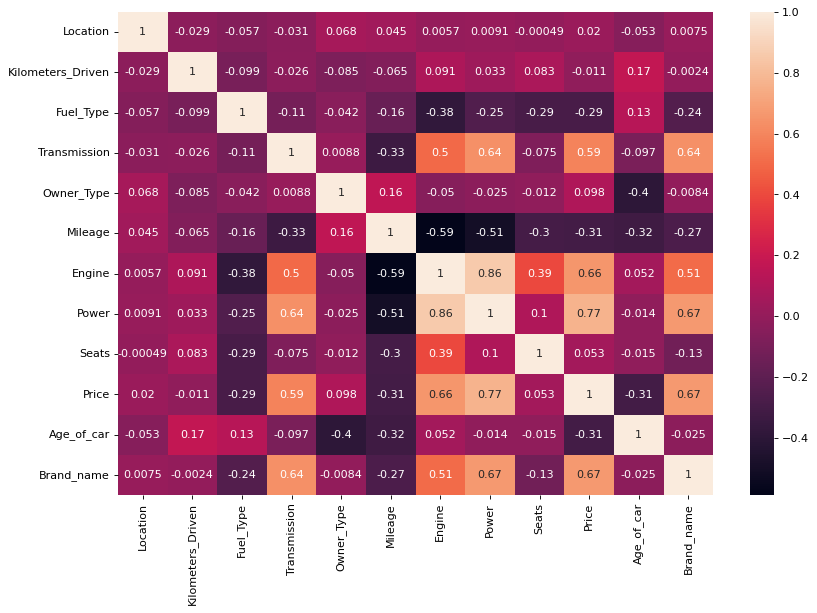

In [138]:
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(data=train_data.corr(), annot=True)
plt.show()

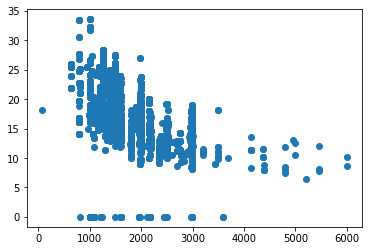

In [146]:
plt.scatter(df['Engine'],df['Mileage'])
plt.show()

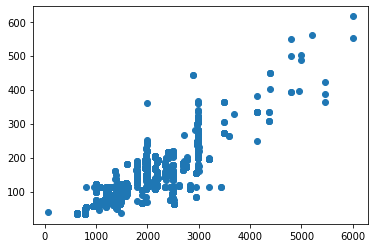

In [147]:
plt.scatter(df['Engine'],df['Power'])
plt.show()

In [139]:
# Here (Engine,Mileage) are highly  corelated and (Engine,power) are highly 
# corelated show I drop Engine from the data frame
train_data = train_data.drop('Engine', axis = 1)

### Dividing the data set into traning and testing

In [142]:
X = train_data.drop('Price', axis=1)
y = train_data['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [174]:
X_train

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Age_of_car,Brand_name
4248,0.009,76155,0.0012,1,4,18.60,79.40,5.0,10,1
4129,0.004,64637,0.0011,1,4,22.77,98.59,5.0,7,1
2534,0.008,2900,0.0011,1,4,24.30,88.50,5.0,3,1
2893,0.009,150000,0.0011,1,4,12.99,100.60,8.0,10,1
2860,0.005,98500,0.0011,1,4,22.95,74.00,5.0,4,1
...,...,...,...,...,...,...,...,...,...,...
3772,0.003,27000,0.0012,2,4,17.97,99.60,5.0,6,2
5191,0.003,9000,0.0011,2,4,12.62,158.00,7.0,2,1
5226,0.005,140000,0.0011,1,3,15.10,140.00,7.0,8,1
5390,0.006,76414,0.0011,1,4,25.80,98.60,5.0,7,1


### Using multiple linear regression

In [143]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print(' test data: ', regression_model.score(X_test, y_test))

 test data:  0.5880063234032509


### Using randomforest regression with 500 estimators 

In [144]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500)
rf_model.fit(X_train,y_train)
RandomForestRegressorScore = rf_model.score(X_test, y_test)
print('test data: ', rf_model.score(X_test, y_test))

test data:  0.8742105186700561


In [173]:
X_train.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Power', 'Seats', 'Age_of_car', 'Brand_name'],
      dtype='object')

### Using Gradiantboosing regression

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
GradientBoostingRegressorScore = gbr.score(X_test, y_test)
print('test data: ', gbr.score(X_test, y_test))

test data:  0.8686367185746848


   # Conclusion
### Here randomforest with 500 estimators give more accuracy i'e  87%  so for prediction purpose randomforest is used .

# checking prediction

In [148]:
import joblib as jb
mymodel = jb.dump(rf_model , "predicted_price.pkl")

In [159]:
import json
cols = list()
for col in X_train.columns:
    cols.append(col.lower())
columns = {'data_columns' : cols}

with open('predictors.json' , 'w') as f :
        f.write(json.dumps(columns))

In [160]:
with open('predictors.json' , 'r') as e :
        data_col = json.load(e)
print(data_col['data_columns'])  

['location', 'kilometers_driven', 'fuel_type', 'transmission', 'owner_type', 'mileage', 'power', 'seats', 'age_of_car', 'brand_name']


In [165]:
def read_artifects():
    global data_col
    with open('predictors.json' , 'r') as e :
        data_col = json.load(e)['data_columns']
        return data_col
read_artifects()  

['location',
 'kilometers_driven',
 'fuel_type',
 'transmission',
 'owner_type',
 'mileage',
 'power',
 'seats',
 'age_of_car',
 'brand_name']

In [168]:
def show_feature_name():
    return data_col
show_feature_name()

['location',
 'kilometers_driven',
 'fuel_type',
 'transmission',
 'owner_type',
 'mileage',
 'power',
 'seats',
 'age_of_car',
 'brand_name']

In [193]:
def price_prediction(location,kilometers_driven,fuel_type,transmission,
                     owner_type,mileage,power,seats,age_of_car,brand_name):
    global mymodel
    mymodel = jb.load("predicted_price.pkl")
    input = np.zeros(len(show_feature_name()))
    input[0] = location
    input[1] = kilometers_driven
    input[2] = fuel_type
    input[3] = transmission
    input[4] = owner_type
    input[5] = mileage
    input[6] = power
    input[7] = seats
    input[8] = age_of_car
    input[9] = brand_name
    prediction = mymodel.predict([input])
    return np.round(prediction , 2)

In [198]:
read_artifects()
show_feature_name()
print("The price of the car is " , str(price_prediction(0.009,76155,0.0012,1,4,18.60,79.40,5.0,10,1)[0]) +'lac')

The price of the car is  2.25lac
